In [1]:
import pandas as pd
import numpy as np
import os
from save_excel import save_excel
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Import the cleaned dataset
csv_file_path = '..\\dataset\\international_top_terms_cleaned.csv'
df = pd.read_csv(csv_file_path)
df.head(10)

,country_code,region_name,region_code,week,score,rank,country_name,term,refresh_date
0,FR,Aquitaine,FR-B,2019-09-15,57.0,14,France,Apple,2024-06-14
1,FR,Auvergne,FR-C,2019-09-08,83.0,14,France,Apple,2024-06-14
2,FR,Burgundy,FR-D,2019-09-01,100.0,14,France,Apple,2024-06-14
3,FR,Burgundy,FR-D,2021-09-12,62.0,14,France,Apple,2024-06-14
4,FR,Burgundy,FR-D,2021-11-21,64.0,14,France,Apple,2024-06-14
5,FR,Burgundy,FR-D,2022-01-09,51.0,14,France,Apple,2024-06-14
6,FR,Burgundy,FR-D,2022-11-20,62.0,14,France,Apple,2024-06-14
7,FR,Burgundy,FR-D,2022-12-11,51.0,14,France,Apple,2024-06-14
8,FR,Burgundy,FR-D,2023-07-30,51.0,14,France,Apple,2024-06-14
9,FR,Burgundy,FR-D,2023-11-19,60.0,14,France,Apple,2024-06-14


In [2]:
def plot_rules_scatter(rules):
    # Extract support and confidence
    support = rules['support']
    confidence = rules['confidence']
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(support, confidence, alpha=0.5, c=confidence, cmap='viridis')
    
    # Customize the plot
    plt.title('Association Rules Scatter Plot')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.colorbar(label='Confidence')
    
    # Optional: Annotate points
    for i, txt in enumerate(rules.index):
        if i < 10:  # Optionally limit the number of annotations
            plt.annotate(txt, (support[i], confidence[i]))
    
    plt.show()

# Splitting the Data in Accordance to the Country

## Australia
```country_name```

```region_name```

```term```

```score```

```mean``` - rows with same region_name and term will have their mean score computed

In [3]:
basket_Australia = (df[df['country_name'] == "Australia"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_Australia)

term                          Alex de Minaur  Alexa Leary  Alice Springs  \
region_name                                                                
Australian Capital Territory       62.000000          0.0      57.000000   
New South Wales                    56.500000          0.0       0.000000   
Northern Territory                100.000000        100.0      77.589744   
Queensland                         75.333333          0.0      54.400000   
South Australia                    72.000000          0.0      64.214286   
Tasmania                           75.000000          0.0      61.000000   
Victoria                           59.000000          0.0      65.666667   
Western Australia                  82.000000          0.0      66.750000   

term                              Apple  Ash Barty  Bacchus Marsh Grammar  \
region_name                                                                 
Australian Capital Territory  65.750000        0.0                    0.0   
New Sout

### Conversion to binary vector

In [4]:
def binary_encode(x):
    if(x <= 0): 
        return 0
    if(x >= 1): 
        return 1

basket_encoded = basket_Australia.map(binary_encode) 
basket_Australia = basket_encoded

print(basket_Australia)

term                          Alex de Minaur  Alexa Leary  Alice Springs  \
region_name                                                                
Australian Capital Territory               1            0              1   
New South Wales                            1            0              0   
Northern Territory                         1            1              1   
Queensland                                 1            0              1   
South Australia                            1            0              1   
Tasmania                                   1            0              1   
Victoria                                   1            0              1   
Western Australia                          1            0              1   

term                          Apple  Ash Barty  Bacchus Marsh Grammar  \
region_name                                                             
Australian Capital Territory      1          0                      0   
New South Wales     

### Apriori Algorithm

```min_support``` - percentage in which the terms occurs together

```min_threshold``` - specifies the minimum confidence or lift for an association rule to be considered significant

```confidence``` - Measures how often the consequent of a rule appears given the antecedent

```lift``` - Indicates the likeliness consequent is to occur when the antecedent is present

In [5]:
frq_items = apriori(basket_Australia.astype('bool'), min_support = 0.9, use_colnames = True)
  
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

save_excel(rules, "Australia")
plot_rules_scatter(rules)

## Argentina

In [6]:
# Top terms in Argentina
basket_Argentina = (df[df['country_name'] == "Argentina"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_Argentina)

term                                Alcaraz    Aldosivi  Alphonso Davies  \
region_name                                                                
Autonomous City of Buenos Aires   75.000000   55.000000              0.0   
Buenos Aires Province             50.000000   71.500000              0.0   
Catamarca Province                 0.000000  100.000000              0.0   
Chaco Province                    59.000000    0.000000              0.0   
Chubut Province                   57.500000    0.000000              0.0   
Cordoba                            0.000000   64.333333              0.0   
Corrientes Province               89.000000   57.000000             57.0   
Entre Rios                       100.000000    0.000000             70.0   
Formosa Province                  75.000000    0.000000              0.0   
Jujuy                              0.000000    0.000000              0.0   
La Pampa Province                  0.000000   56.000000              0.0   
La Rioja Pro

In [7]:
basket_encoded_Argentina = basket_Argentina.map(binary_encode) 
basket_Argentina = basket_encoded_Argentina

In [27]:
frq_items = apriori(basket_Argentina.astype('bool'), min_support = 0.5, use_colnames = True)
   
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "Argentina")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37,(Bridgerton),(Independiente),0.625000,0.875,0.625000,1.0,1.142857,0.078125,inf,0.333333
53,(Copa america),(San Antonio),0.500000,0.875,0.500000,1.0,1.142857,0.062500,inf,0.250000
94,"(Alcaraz, Bridgerton)",(Independiente),0.500000,0.875,0.500000,1.0,1.142857,0.062500,inf,0.250000
355,"(Futbol argentino, Bridgerton)",(Independiente),0.541667,0.875,0.541667,1.0,1.142857,0.067708,inf,0.272727
361,"(Bridgerton, Primera división)",(Independiente),0.541667,0.875,0.541667,1.0,1.142857,0.067708,inf,0.272727
...,...,...,...,...,...,...,...,...,...,...
2758,(River),"(Racing, Independiente, San Antonio, TN)",1.000000,0.500,0.500000,0.5,1.000000,0.000000,1.0,0.000000
2842,(River),"(Aldosivi, Primera división, San Antonio, Futb...",1.000000,0.500,0.500000,0.5,1.000000,0.000000,1.0,0.000000
3000,(River),"(Independiente, Primera división, TN, Futbol a...",1.000000,0.500,0.500000,0.5,1.000000,0.000000,1.0,0.000000
3043,(River),"(Independiente, Primera división, TN, San Anto...",1.000000,0.500,0.500000,0.5,1.000000,0.000000,1.0,0.000000


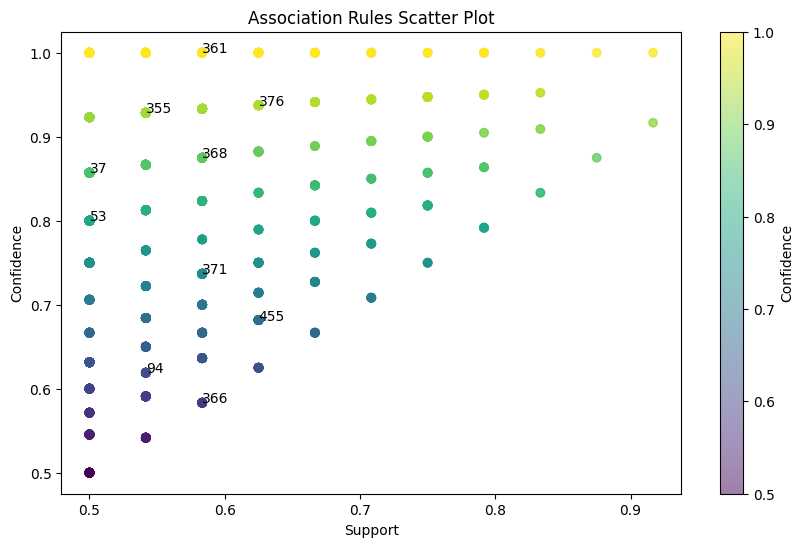

In [28]:
plot_rules_scatter(rules)

## Philippines

In [9]:
# Top terms in Philippines
basket_Philippines = (df[df['country_name'] == "Philippines"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_Philippines)

term                                     19     Access  Angelina Jolie  \
region_name                                                              
Autonomous Region in Muslim Mindanao    0.0  59.750000        0.000000   
Bicol                                  67.0  65.137931        0.000000   
Cagayan Valley                          0.0  63.428571        0.000000   
Calabarzon                             72.0  70.625000        0.000000   
Caraga                                100.0  66.866667       92.000000   
Central Luzon                          96.0  67.862069        0.000000   
Central Visayas                        58.0  69.111111       59.000000   
Cordillera Administrative Region        0.0  69.312500      100.000000   
Davao Region                           56.5  65.172414       76.333333   
Eastern Visayas                        67.0  59.500000        0.000000   
Ilocos Region                           0.0  59.772727       76.000000   
MIMAROPA                              

In [10]:
basket_encoded_Philippines = basket_Philippines.map(binary_encode) 
basket_Philippines = basket_encoded_Philippines

print(basket_Philippines)

term                                  19  Access  Angelina Jolie  Anouk Aimée  \
region_name                                                                     
Autonomous Region in Muslim Mindanao   0       1               0            0   
Bicol                                  1       1               0            0   
Cagayan Valley                         0       1               0            0   
Calabarzon                             1       1               0            0   
Caraga                                 1       1               1            0   
Central Luzon                          1       1               0            0   
Central Visayas                        1       1               1            1   
Cordillera Administrative Region       0       1               1            0   
Davao Region                           1       1               1            0   
Eastern Visayas                        1       1               0            0   
Ilocos Region               

After frequent Items


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ESPN NBA),(Access),0.882353,1.000000,0.882353,1.000000,1.0,0.0,inf,0.0
3,(Jose Rizal),(Access),0.823529,1.000000,0.823529,1.000000,1.0,0.0,inf,0.0
4,(June),(Access),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
5,(Access),(June),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
6,(Access),(NBA),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
1441,(Sports),"(UFC, June, NBA games, Access, NBA)",1.000000,0.823529,0.823529,0.823529,1.0,0.0,1.0,0.0
1442,(June),"(UFC, Sports, NBA games, Access, NBA)",1.000000,0.823529,0.823529,0.823529,1.0,0.0,1.0,0.0
1443,(NBA games),"(UFC, Sports, June, Access, NBA)",1.000000,0.823529,0.823529,0.823529,1.0,0.0,1.0,0.0
1444,(Access),"(UFC, Sports, June, NBA games, NBA)",1.000000,0.823529,0.823529,0.823529,1.0,0.0,1.0,0.0


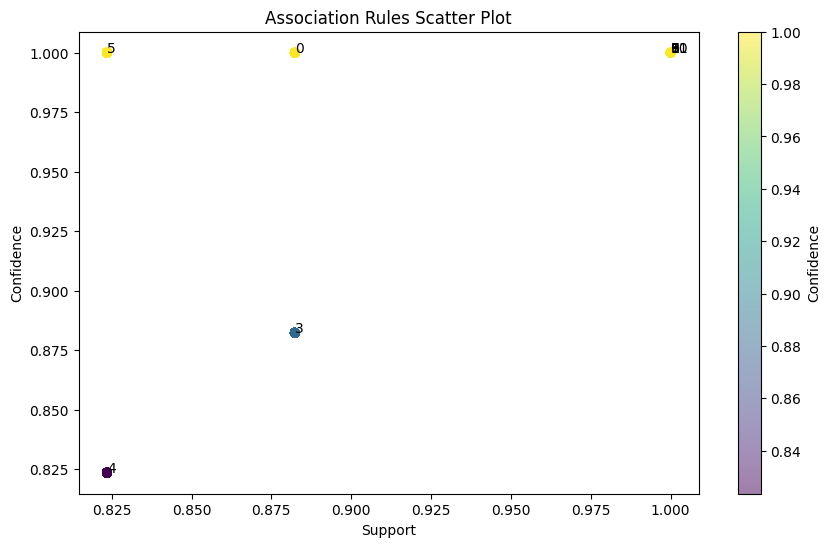

In [11]:
frq_items = apriori(basket_Philippines.astype('bool'), min_support = 0.8, use_colnames = True)

print("After frequent Items")
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "Philippines")
plot_rules_scatter(rules)

## South Korea

In [12]:
# Top terms in South Korea
basket_SouthKorea = (df[df['country_name'] == "South Korea"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_SouthKorea)

term                 CPI        NBA   WWDC    강민구    고준희    권경애    김계란    김레아  \
region_name                                                                     
Busan                0.0  63.333333    0.0    0.0    0.0    0.0   83.5    0.0   
Chungcheongbuk-do    0.0  63.666667    0.0    0.0    0.0    0.0    0.0   80.0   
Chungcheongnam-do   77.0  60.571429    0.0  100.0  100.0    0.0   56.0    0.0   
Daegu                0.0  59.000000    0.0    0.0    0.0    0.0   52.0   94.0   
Daejeon            100.0  55.500000    0.0    0.0    0.0  100.0    0.0    0.0   
Gangwon-do           0.0  54.000000    0.0    0.0    0.0    0.0  100.0    0.0   
Gwangju            100.0  62.000000    0.0    0.0    0.0    0.0   84.0  100.0   
Gyeonggi-do         77.5  61.571429    0.0  100.0    0.0    0.0   64.5    0.0   
Gyeongsangbuk-do     0.0  64.894737    0.0    0.0    0.0    0.0   61.5    0.0   
Gyeongsangnam-do     0.0  54.000000  100.0  100.0    0.0    0.0   67.0    0.0   
Incheon             59.0  54

In [13]:
basket_encoded_SouthKorea = basket_SouthKorea.map(binary_encode) 
basket_SouthKorea = basket_encoded_SouthKorea

print(basket_SouthKorea)

term               CPI  NBA  WWDC  강민구  고준희  권경애  김계란  김레아  김미성  노스트라다무스 예언  \
region_name                                                                   
Busan                0    1     0    0    0    0    1    0    0           0   
Chungcheongbuk-do    0    1     0    0    0    0    0    1    0           0   
Chungcheongnam-do    1    1     0    1    1    0    1    0    0           1   
Daegu                0    1     0    0    0    0    1    1    0           1   
Daejeon              1    1     0    0    0    1    0    0    0           0   
Gangwon-do           0    1     0    0    0    0    1    0    0           1   
Gwangju              1    1     0    0    0    0    1    1    0           0   
Gyeonggi-do          1    1     0    1    0    0    1    0    0           0   
Gyeongsangbuk-do     0    1     0    0    0    0    1    0    0           0   
Gyeongsangnam-do     0    1     1    1    0    0    1    0    0           0   
Incheon              1    1     0    0    1    0    

After frequent Items


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(라이엇),(NBA),0.9375,1.0000,0.9375,1.0000,1.0,0.0,inf,0.0
3,(리그오브레전드),(NBA),0.8750,1.0000,0.8750,1.0000,1.0,0.0,inf,0.0
4,(NBA),(메이플스토리),1.0000,1.0000,1.0000,1.0000,1.0,0.0,inf,0.0
5,(메이플스토리),(NBA),1.0000,1.0000,1.0000,1.0000,1.0,0.0,inf,0.0
6,(엔비디아),(NBA),1.0000,1.0000,1.0000,1.0000,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
435,"(NBA, 메이플스토리)","(엔비디아, 리그오브레전드, 라이엇, 한국)",1.0000,0.8125,0.8125,0.8125,1.0,0.0,1.0,0.0
436,(한국),"(리그오브레전드, 엔비디아, NBA, 라이엇, 메이플스토리)",1.0000,0.8125,0.8125,0.8125,1.0,0.0,1.0,0.0
437,(엔비디아),"(한국, 리그오브레전드, NBA, 라이엇, 메이플스토리)",1.0000,0.8125,0.8125,0.8125,1.0,0.0,1.0,0.0
438,(NBA),"(한국, 리그오브레전드, 엔비디아, 라이엇, 메이플스토리)",1.0000,0.8125,0.8125,0.8125,1.0,0.0,1.0,0.0


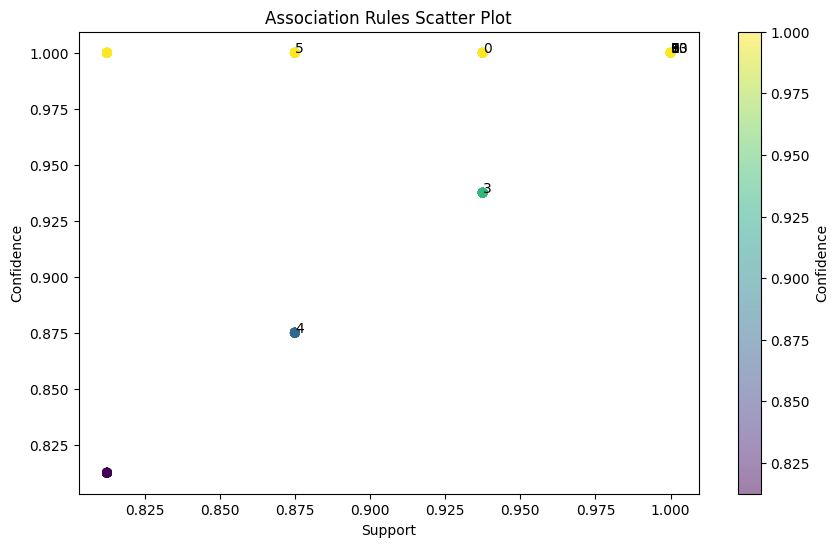

In [14]:
frq_items = apriori(basket_SouthKorea.astype('bool'), min_support = 0.8, use_colnames = True)

print("After frequent Items")
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "South_Korea")
plot_rules_scatter(rules)

## Finland

In [15]:
# Top terms in Finland
basket_Finland = (df[df['country_name'] == "Finland"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_Finland)

term                   Adam Lambert  Albania       Alko      Apple  Barkov  \
region_name                                                                  
Central Finland                 0.0    100.0  59.333333  59.500000     0.0   
Central Ostrobothnia            0.0      0.0  63.000000  58.000000     0.0   
Kainuu                        100.0     94.0  50.000000  82.500000     0.0   
Kymenlaakso                     0.0      0.0  52.500000  61.000000     0.0   
Lapland                       100.0      0.0  69.250000  57.333333     0.0   
North Karelia                   0.0    100.0  57.000000  59.200000     0.0   
Northern Ostrobothnia          76.0     88.0  73.000000  64.166667   100.0   
Northern Savonia                0.0     75.0   0.000000  62.100000     0.0   
Ostrobothnia                    0.0      0.0  62.000000  57.900000     0.0   
Pirkanmaa                       0.0      0.0  71.500000  54.166667     0.0   
Päijänne Tavastia               0.0      0.0  61.000000  53.7142

In [16]:
basket_encoded_Finland = basket_Finland.map(binary_encode) 
basket_Finland = basket_encoded_Finland

print(basket_Finland)

term                   Adam Lambert  Albania  Alko  Apple  Barkov  Bellingham  \
region_name                                                                     
Central Finland                   0        1     1      1       0           0   
Central Ostrobothnia              0        0     1      1       0           0   
Kainuu                            1        1     1      1       0           1   
Kymenlaakso                       0        0     1      1       0           1   
Lapland                           1        0     1      1       0           0   
North Karelia                     0        1     1      1       0           0   
Northern Ostrobothnia             1        1     1      1       1           0   
Northern Savonia                  0        1     0      1       0           0   
Ostrobothnia                      0        0     1      1       0           0   
Pirkanmaa                         0        0     1      1       0           0   
Päijänne Tavastia           

In [29]:
frq_items = apriori(basket_Finland.astype('bool'), min_support = 0.3, use_colnames = True)
  
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "Finland")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1107,"(Bridgerton, Billie Eilish)","(UFC, Nvidia)",0.388889,0.500000,0.388889,1.000000,2.0,0.194444,inf,0.818182
1426,"(Alko, Bridgerton, Billie Eilish)","(UFC, Nvidia)",0.333333,0.500000,0.333333,1.000000,2.0,0.166667,inf,0.750000
1451,"(Apple, Bridgerton, Billie Eilish)","(UFC, Nvidia)",0.388889,0.500000,0.388889,1.000000,2.0,0.194444,inf,0.818182
1465,"(Bridgerton, Billie Eilish)","(Apple, UFC, Nvidia)",0.388889,0.500000,0.388889,1.000000,2.0,0.194444,inf,0.818182
1485,"(Apple, Alko, Bridgerton, Billie Eilish)","(UFC, Nvidia)",0.333333,0.500000,0.333333,1.000000,2.0,0.166667,inf,0.750000
...,...,...,...,...,...,...,...,...,...,...
1327,(Apple),"(Real Madrid, Ronaldo, Alko, Nvidia)",1.000000,0.333333,0.333333,0.333333,1.0,0.000000,1.0,0.000000
1350,(Apple),"(Ronaldo, Nvidia, Alko, Star Wars)",1.000000,0.333333,0.333333,0.333333,1.0,0.000000,1.0,0.000000
1379,(Apple),"(UFC, Ronaldo, Alko, Nvidia)",1.000000,0.333333,0.333333,0.333333,1.0,0.000000,1.0,0.000000
1409,(Apple),"(UFC, Nvidia, Alko, Star Wars)",1.000000,0.333333,0.333333,0.333333,1.0,0.000000,1.0,0.000000


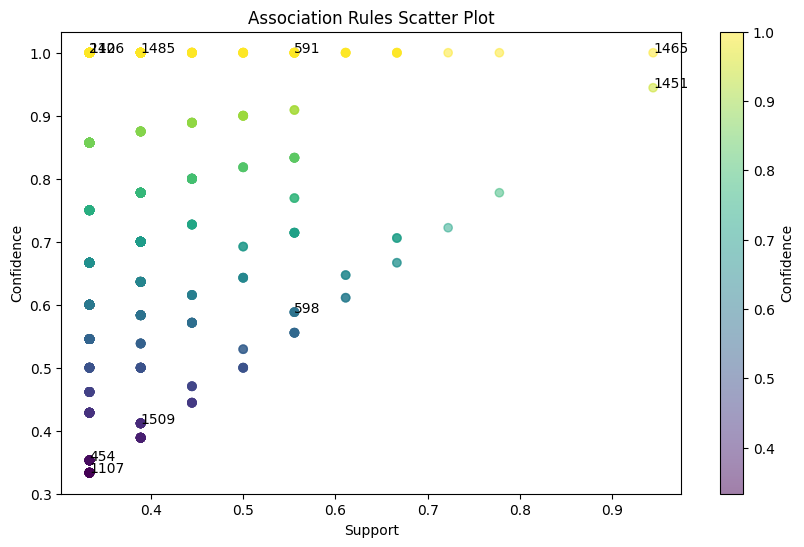

In [30]:
plot_rules_scatter(rules)

## United Kingdom

In [18]:
# Top terms in United Kingdom
basket_UK = (df[df['country_name'] == "United Kingdom"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_UK)

term              Alan Shearer  Albania      Apple  BGT final  Bath Rugby  \
region_name                                                                 
England                    0.0      0.0  58.176471       74.0        50.0   
Northern Ireland          73.5      0.0  56.909091        0.0         0.0   
Scotland                   0.0      0.0  62.238095        0.0        59.5   
Wales                     58.0     74.0  56.444444        0.0        67.0   

term              Billings  Billy Harris  Bridgerton  Britain's Got Talent  \
region_name                                                                  
England                0.0         100.0         0.0                   0.0   
Northern Ireland      94.0           0.0         0.0                   0.0   
Scotland               0.0           0.0        61.0                 100.0   
Wales                 64.0           0.0         0.0                   0.0   

term              Carlo Ancelotti  ...  Sara Cox   Scotland  Sloveni

In [19]:
basket_encoded_UK = basket_UK.map(binary_encode) 
basket_UK = basket_encoded_UK

print(basket_UK)

term              Alan Shearer  Albania  Apple  BGT final  Bath Rugby  \
region_name                                                             
England                      0        0      1          1           1   
Northern Ireland             1        0      1          0           0   
Scotland                     0        0      1          0           1   
Wales                        1        1      1          0           1   

term              Billings  Billy Harris  Bridgerton  Britain's Got Talent  \
region_name                                                                  
England                  0             1           0                     0   
Northern Ireland         1             0           0                     0   
Scotland                 0             0           1                     1   
Wales                    1             0           0                     0   

term              Carlo Ancelotti  ...  Sara Cox  Scotland  Slovenia  Spain  \
region_name  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple),(England football),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(England football),(Apple),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(Apple),(Gary Glitter),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(Gary Glitter),(Apple),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(Apple),(Love Island),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
597,(UFC),"(Apple, Gary Glitter, UCL, Love Island, Englan...",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
598,(Gary Glitter),"(Apple, UFC, UCL, Love Island, England football)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
599,(UCL),"(Apple, UFC, Gary Glitter, Love Island, Englan...",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
600,(Love Island),"(Apple, UFC, Gary Glitter, UCL, England football)",1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


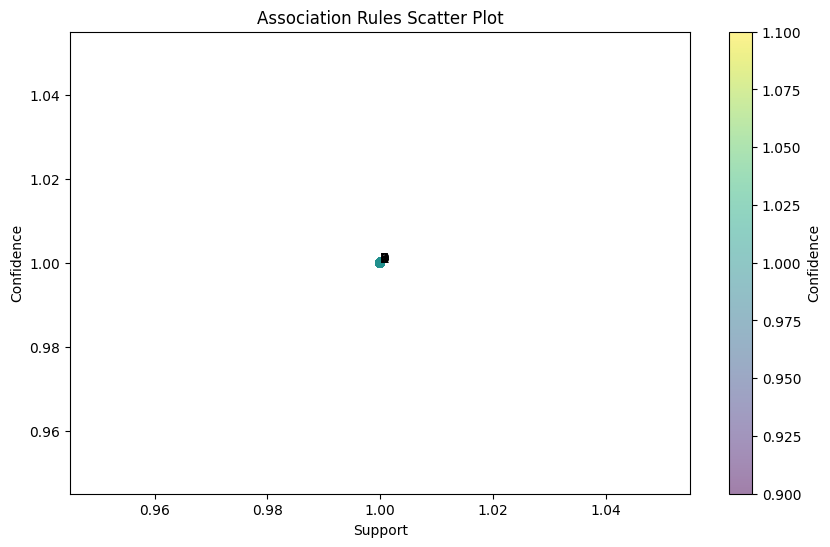

In [20]:
frq_items = apriori(basket_UK.astype('bool'), min_support = 0.8, use_colnames = True)
  
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "United_Kingdom")
plot_rules_scatter(rules)

In [21]:
basket_SF = (df[df['country_name'] == "South Africa"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_SF)


term               Apple  Argentina vs Canada  Bangladesh vs Netherlands  \
region_name                                                                
Eastern Cape   62.692308                  0.0                        0.0   
Free State     60.250000                 81.0                        0.0   
Gauteng        64.727273                  0.0                        0.0   
KwaZulu-Natal  64.923077                  0.0                        0.0   
Limpopo        59.074074                  0.0                        0.0   
Mpumalanga     58.285714                  0.0                       85.0   
North West     61.071429                  0.0                        0.0   
Northern Cape  63.500000                  0.0                        0.0   
Western Cape   69.081081                  0.0                        0.0   

term           Baroka FC  Bridgerton  Charley Hull  Coco Gauff  \
region_name                                                      
Eastern Cape   51.000000   87.0

## South Africa

In [22]:
basket_encoded_SF = basket_SF.map(binary_encode) 
basket_SF = basket_encoded_SF

print(basket_SF)

term           Apple  Argentina vs Canada  Bangladesh vs Netherlands  \
region_name                                                            
Eastern Cape       1                    0                          0   
Free State         1                    1                          0   
Gauteng            1                    0                          0   
KwaZulu-Natal      1                    0                          0   
Limpopo            1                    0                          0   
Mpumalanga         1                    0                          1   
North West         1                    0                          0   
Northern Cape      1                    0                          0   
Western Cape       1                    0                          0   

term           Baroka FC  Bridgerton  Charley Hull  Coco Gauff  \
region_name                                                      
Eastern Cape           1           1             0           0   
Free Stat

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
357,"(Cricket World Cup, Malawi)",(Lesotho),0.555556,0.555556,0.555556,1.000000,1.8,0.246914,inf,1.0
360,(Lesotho),"(Cricket World Cup, Malawi)",0.555556,0.555556,0.555556,1.000000,1.8,0.246914,inf,1.0
369,"(Cricket World Cup, Poetry)",(Lesotho),0.555556,0.555556,0.555556,1.000000,1.8,0.246914,inf,1.0
372,(Lesotho),"(Cricket World Cup, Poetry)",0.555556,0.555556,0.555556,1.000000,1.8,0.246914,inf,1.0
725,"(Apple, Cricket World Cup, Malawi)",(Lesotho),0.555556,0.555556,0.555556,1.000000,1.8,0.246914,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
4404,(Apple),"(Malawi, South Africa, Lesotho, Orlando Pirate...",1.000000,0.555556,0.555556,0.555556,1.0,0.000000,1.0,0.0
4466,(Apple),"(Malawi, South Africa, Orlando Pirates, Poetry...",1.000000,0.555556,0.555556,0.555556,1.0,0.000000,1.0,0.0
4525,(Apple),"(The Boys, Malawi, South Africa, Orlando Pirat...",1.000000,0.555556,0.555556,0.555556,1.0,0.000000,1.0,0.0
4773,(Apple),"(Malawi, South Africa, Lesotho, Orlando Pirate...",1.000000,0.555556,0.555556,0.555556,1.0,0.000000,1.0,0.0


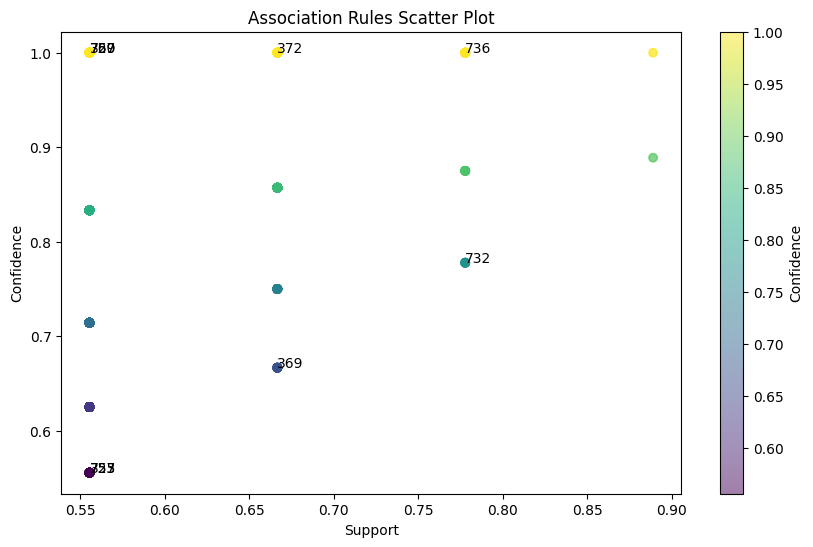

In [23]:
frq_items = apriori(basket_SF.astype('bool'), min_support = 0.5, use_colnames = True)
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "South_Africa")
plot_rules_scatter(rules)

## Canada

In [24]:
basket_Canada = (df[df['country_name'] == "Canada"]
          .groupby(['region_name', 'term'])['score']
          .mean().unstack().reset_index().fillna(0)
          .set_index('region_name'))

print(basket_Canada)

term                       Alex Caruso   Billings  Bobrovsky  Bridgerton  \
region_name                                                                
Alberta                          100.0  56.500000        0.0         0.0   
British Columbia                   0.0   0.000000      100.0        57.0   
Manitoba                           0.0  84.000000        0.0         0.0   
New Brunswick                      0.0   0.000000        0.0         0.0   
Newfoundland and Labrador          0.0   0.000000        0.0        76.5   
Northwest Territories              0.0   0.000000        0.0         0.0   
Nova Scotia                        0.0   0.000000        0.0        71.0   
Nunavut                            0.0   0.000000      100.0         0.0   
Ontario                           54.0  68.400000       86.0         0.0   
Prince Edward Island               0.0   0.000000       94.0        71.5   
Québec                            63.0  58.363636        0.0        85.0   
Saskatchewan

In [25]:
basket_encoded_Canada = basket_Canada.map(binary_encode) 
basket_Canada = basket_encoded_Canada

print(basket_Canada)

term                       Alex Caruso  Billings  Bobrovsky  Bridgerton  \
region_name                                                               
Alberta                              1         1          0           0   
British Columbia                     0         0          1           1   
Manitoba                             0         1          0           0   
New Brunswick                        0         0          0           0   
Newfoundland and Labrador            0         0          0           1   
Northwest Territories                0         0          0           0   
Nova Scotia                          0         0          0           1   
Nunavut                              0         0          1           0   
Ontario                              1         1          1           0   
Prince Edward Island                 0         0          1           1   
Québec                               1         1          0           1   
Saskatchewan             

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
427,"(PGA, Buffalo)","(The Boys, LPGA)",0.461538,0.538462,0.461538,1.000000,1.857143,0.213018,inf,0.857143
625,"(The Boys, Oilers)","(PGA, Rangers)",0.461538,0.538462,0.461538,1.000000,1.857143,0.213018,inf,0.857143
672,"(PGA, Et, Buffalo)","(The Boys, LPGA)",0.461538,0.538462,0.461538,1.000000,1.857143,0.213018,inf,0.857143
679,"(PGA, Buffalo)","(The Boys, Et, LPGA)",0.461538,0.538462,0.461538,1.000000,1.857143,0.213018,inf,0.857143
733,"(The Boys, Oilers, Et)","(PGA, Rangers)",0.461538,0.538462,0.461538,1.000000,1.857143,0.213018,inf,0.857143
...,...,...,...,...,...,...,...,...,...,...
588,(Et),"(The Boys, Oilers, Rangers)",1.000000,0.461538,0.461538,0.461538,1.000000,0.000000,1.0,0.000000
660,(Et),"(Rangers, Buffalo, Oilers, LPGA)",1.000000,0.461538,0.461538,0.461538,1.000000,0.000000,1.0,0.000000
691,(Et),"(PGA, The Boys, Buffalo, LPGA)",1.000000,0.461538,0.461538,0.461538,1.000000,0.000000,1.0,0.000000
720,(Et),"(PGA, The Boys, Rangers, LPGA)",1.000000,0.461538,0.461538,0.461538,1.000000,0.000000,1.0,0.000000


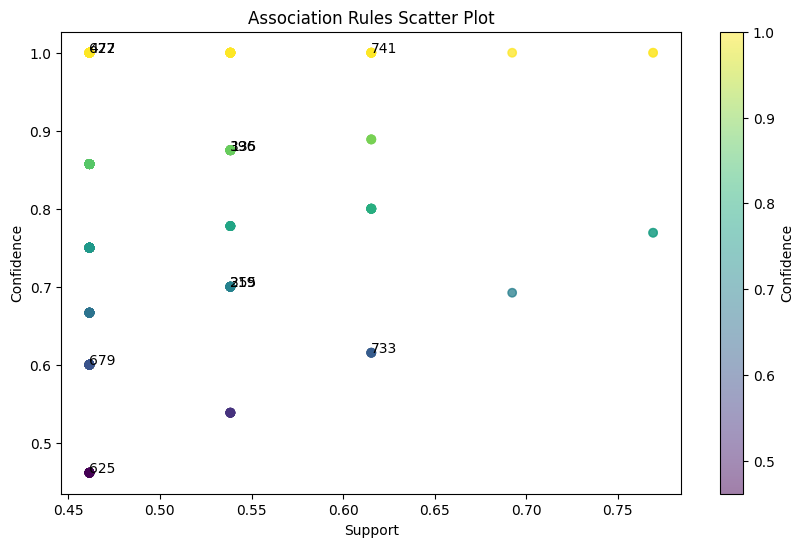

In [26]:
frq_items = apriori(basket_Canada.astype('bool'), min_support = 0.4, use_colnames = True)
  
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

display(rules)
save_excel(rules, "Canada")
plot_rules_scatter(rules)